# Datasets

## The UCINet Datsets 

Multi Layer Graph datasets are downloaded from this website:
http://vlado.fmf.uni-lj.si/pub/networks/data/UciNet/UciData.htm

Descriptions on each dataset can be found there. 

In [41]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

FIG_SIZE = 5


def read_adjacency_matrices(file_path):
    with open(file_path, 'r') as file:
        data = file.read()
    lines = data.split('\n')

    N, NM = [int(value.split('=')[1]) for value in lines[1].split()]

    if "ROW LABELS:" in lines:
        labels_index = lines.index("ROW LABELS:")
        row_labels = lines[labels_index + 1:labels_index + 1 + N]
    else:
        row_labels = None
        
    # get level labels
    level_index = lines.index("LEVEL LABELS:")
    level_labels = lines[level_index + 1:level_index + 1 + NM]
    
    start_index = lines.index("DATA:")
    # Extract the adjacency matrices as np arrays
    adjacency_matrices = []
    for i in range(NM):
        matrix_lines = lines[start_index + 1 + i * N:start_index + 1 + (i + 1) * N]
        matrix = np.array([list(map(int, line.split())) for line in matrix_lines])
        adjacency_matrices.append(matrix)

    return adjacency_matrices, level_labels, row_labels


In [42]:
def display_MLG(labels, MLG=None, adjacency_matrices=None):
    if MLG is None and adjacency_matrices is None:
        raise ValueError("Both MLG and adjacency_matrices are None")
    elif MLG is not None and adjacency_matrices is not None:
        raise ValueError("Both MLG and adjacency_matrices are not None")
    elif MLG is not None:
        M = len(MLG)
        adjacency_matrices = [nx.adjacency_matrix(G) for G in MLG]
    else:
        M = len(adjacency_matrices)
        MLG = [nx.from_numpy_array(adjacency_matrix) for adjacency_matrix in adjacency_matrices]

    fig, axes = plt.subplots(1, M, figsize=(FIG_SIZE * M, FIG_SIZE))

    for i, G in enumerate(MLG):
        nx.draw(G, with_labels=False, node_size=50, node_color='black', edge_color='black', ax=axes[i])
        axes[i].set_title(f"{labels[i]}")


    fig, axes = plt.subplots(1, M, figsize=(FIG_SIZE * M, FIG_SIZE))
    for i, adjacency_matrix in enumerate(adjacency_matrices):
        axes[i].spy(adjacency_matrix, markersize=2, marker="D", color="Blue")
        axes[i].set_title(f"{labels[i]}")

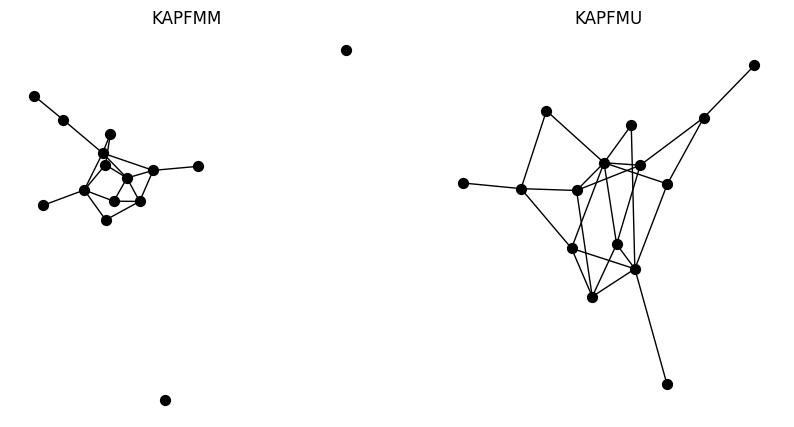

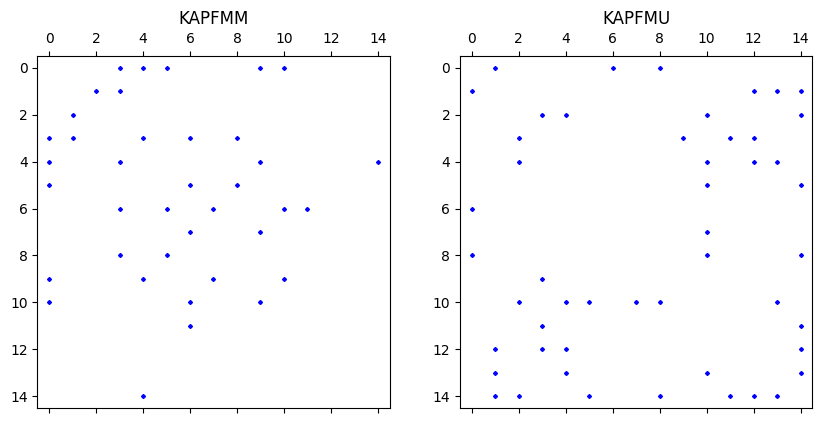

In [43]:
adjacency_matrices, labels, _ = read_adjacency_matrices('datasets/UCINet/kapmine.dat')
display_MLG(labels=labels, adjacency_matrices=adjacency_matrices)

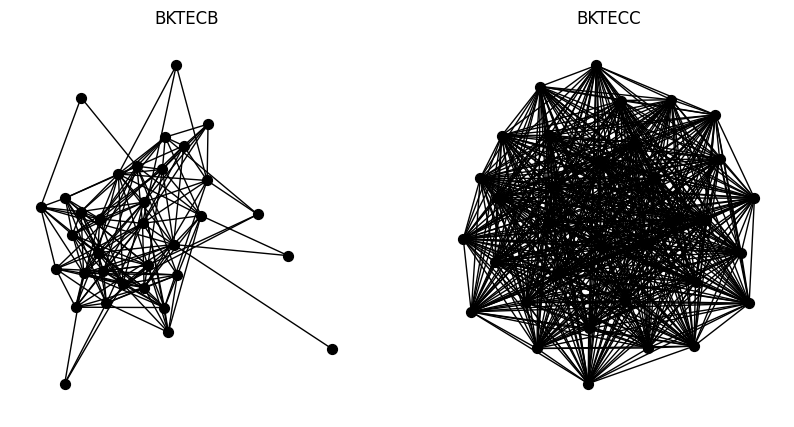

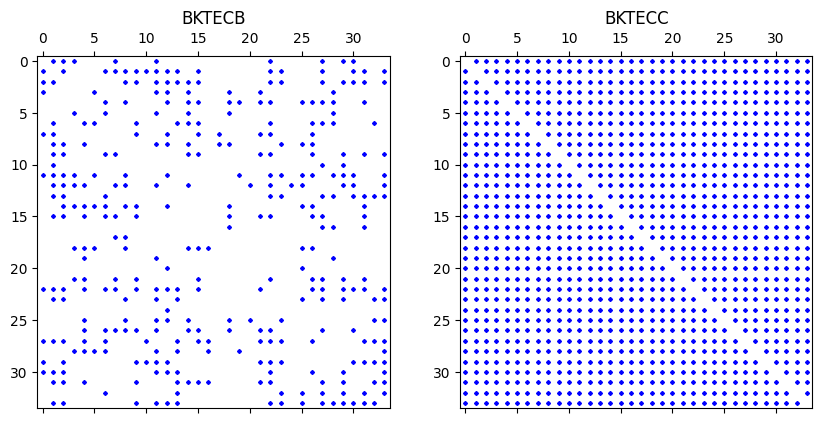

In [44]:
adjacency_matrices, labels, _ = read_adjacency_matrices('datasets/UCINet/bktec_processed.dat')
display_MLG(labels=labels, adjacency_matrices=adjacency_matrices)

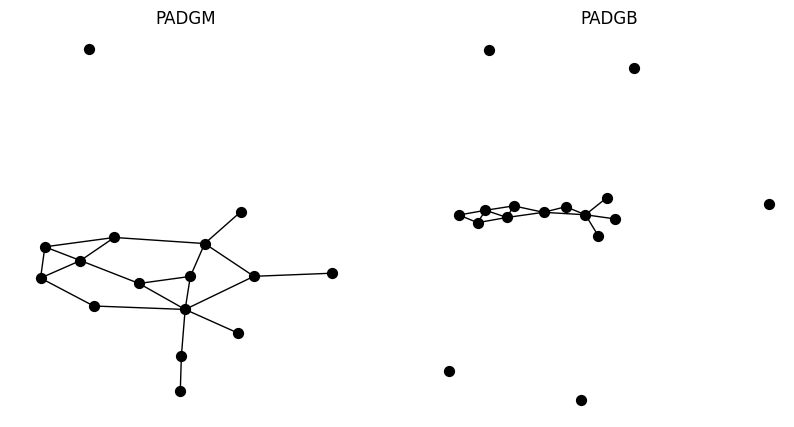

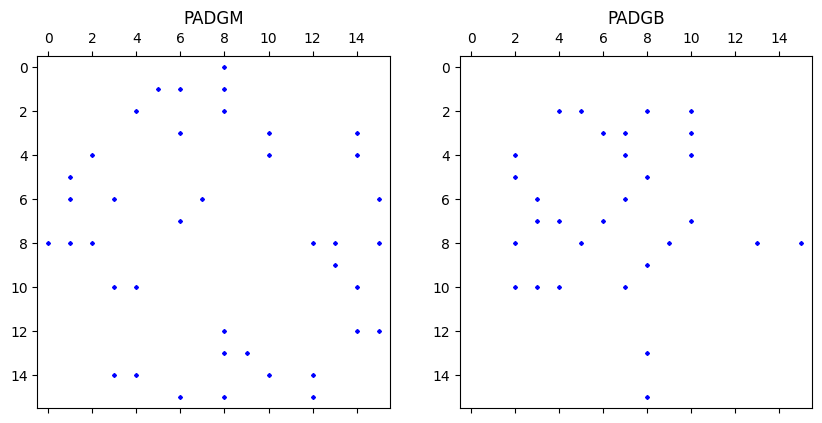

In [45]:
adjacency_matrices, labels, _ = read_adjacency_matrices('datasets/UCINet/padgett.dat')
display_MLG(labels=labels, adjacency_matrices=adjacency_matrices)

## The AUCS dataset

### Description of Dataset
This dataset is downloaded from https://github.com/justin830827/Community-Detection-in-Multilayer-Graph/blob/master/data/ . In this graph, the multiple layers represent relationships between 61 employees of a University department in five different aspects: (i) coworking, (ii) having lunch together, (iii) Facebook friendship, (iv) o✏ine friendship (having fun together), and (v) coauthor-ship.

### Layers
* Facebook,UNDIRECTED
* Lunch,UNDIRECTED
* Coauthor,UNDIRECTED
* Leisure,UNDIRECTED
* Work,UNDIRECTED
### ACTOR ATTRIBUTES
* ResearchGroup,STRING
* Role,STRING

In [38]:
def init_graph():
    path = './datasets/AUCS/aucs_nodelist.txt'
    g = nx.Graph()
    with open(path) as f:
        for line in f:
            line = line.strip().split(',')
            if line[1] == 'NA':
                continue
            else:
                g.add_node(line[0])
    return g


def get_truth():
    truth = []
    na_list = []
    path = './datasets/AUCS/aucs_nodelist.txt'
    with open(path) as f:
        for line in f:
            line = line.strip().split(',')
            t = line[1]
            if t == 'NA':
                na_list.append(line[0])
            else:
                truth.append(int(t[-1])-1)
    return truth, na_list

path = './datasets/AUCS/aucs_edgelist.txt'

# Declare each layer's graph
lunch = init_graph()
facebook = init_graph()
leisure = init_graph()
work = init_graph()
coauthor = init_graph()
table = {
    'lunch': lunch,
    'facebook': facebook,
    'leisure': leisure,
    'work': work,
    'coauthor': coauthor,
}
truth, na = get_truth()

# Load data into graph
print("--------------------------------------------------Load multilayers graph--------------------------------------------------")
with open(path) as f:
    for line in f:
        line = line.strip().split(',')
        name = line[2]
        if line[0] in na or line[1] in na:
            continue
        else:
            table[name].add_edge(line[0], line[1])
for name, graph in table.items():
    print("\nGraph: {}".format(name))
    print("\tNumber of nodes: {}".format(nx.number_of_nodes(graph)))
    print("\tNumber of edges: {}".format(nx.number_of_edges(graph)))

graph_list = [lunch, work, coauthor, leisure]
node_list = list(lunch.nodes)


--------------------------------------------------Load multilayers graph--------------------------------------------------

Graph: lunch
	Number of nodes: 55
	Number of edges: 176

Graph: facebook
	Number of nodes: 55
	Number of edges: 116

Graph: leisure
	Number of nodes: 55
	Number of edges: 88

Graph: work
	Number of nodes: 55
	Number of edges: 155

Graph: coauthor
	Number of nodes: 55
	Number of edges: 21


In [47]:
labels = list(table.keys())

In [49]:
MLG = list(table.values()) 

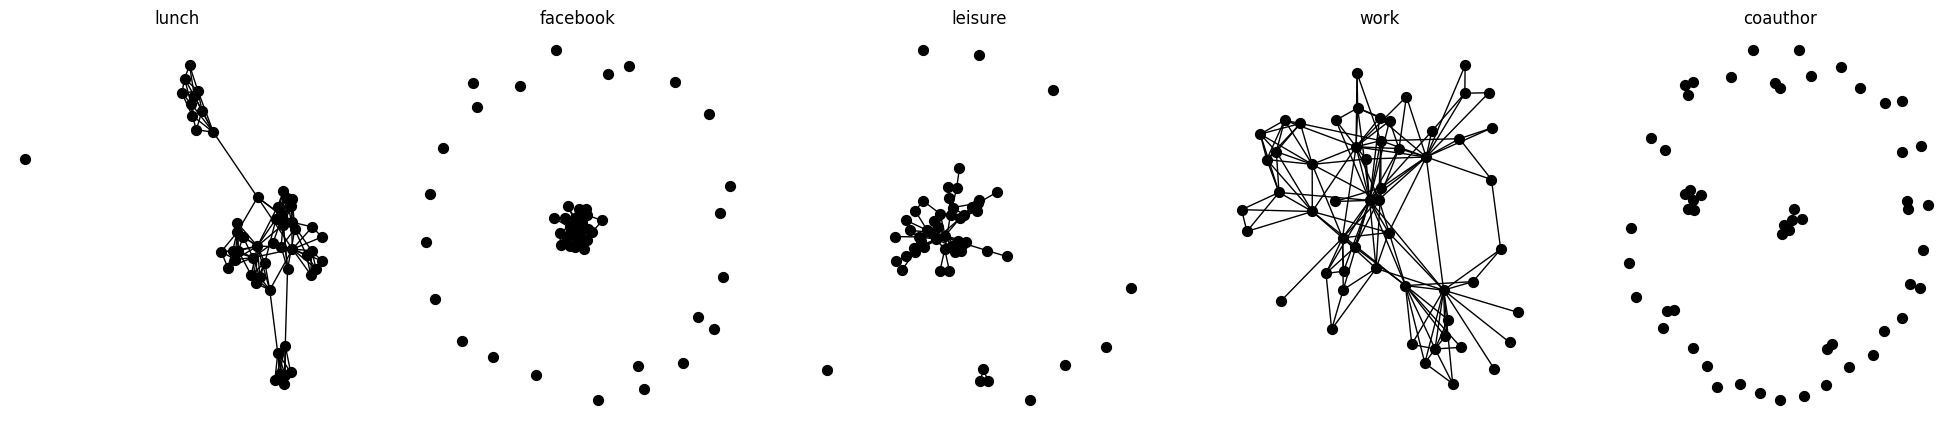

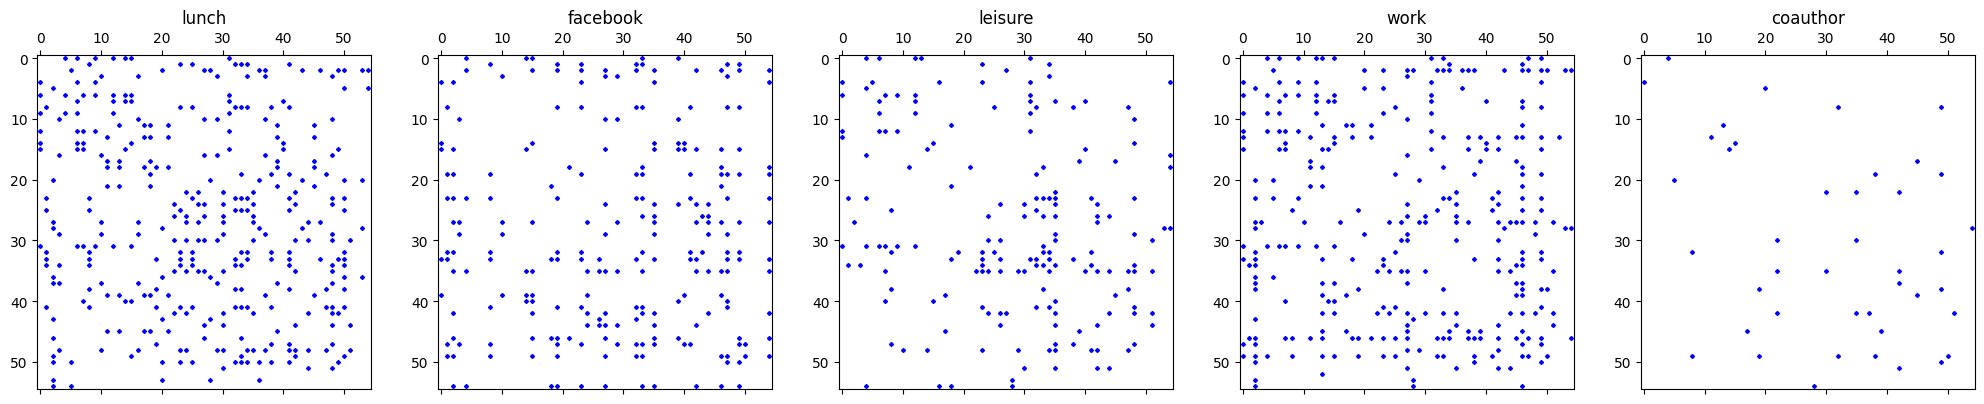

In [50]:
display_MLG(labels=labels, MLG=MLG)